In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings


## Setup some basic settings for the notebook

In [2]:
filterwarnings('ignore')
sns.set_theme(context='notebook', style='darkgrid', palette='Paired', font='sans-serif', font_scale=1)
plt.style.use('seaborn-v0_8-darkgrid') # Modern looking grid
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
# 'tab10': 10, 'tab20': 20, 'tab20b': 20, 'tab20c': 20, 'Set1': 9, 'Set2': 8, 'Set3': 12, 'Accent': 8, 'Paired': 12, 'Pastel1': 9, 'Pastel2': 8, 'Dark2': 8, 'tab10', 'tab20', 'tab20b', 'tab20c', 'Set1', 'Set2', 'Set3', 'Accent', 'Paired', 'Pastel1', 'Pastel2', 'Dark2', 'deep', 'deep6', 'muted', 'muted6', 'pastel', 'pastel6', 'bright', 'bright6', 'dark', 'dark6', 'colorblind', 'colorblind6'

In [3]:
# training_data = pd.read_csv('https://raw.githubusercontent.com/Zaid-N-Ansari/PG-Mini-Project/refs/heads/main/Data/RossmannStoreSales/train.csv')
training_data = pd.read_csv('../Data/RossmannStoreSales/train.csv')
training_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
# testing_data = pd.read_csv('https://raw.githubusercontent.com/Zaid-N-Ansari/PG-Mini-Project/refs/heads/main/Data/RossmannStoreSales/test.csv')
testing_data = pd.read_csv('../Data/RossmannStoreSales/test.csv')
testing_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
# store_data = pd.read_csv('https://raw.githubusercontent.com/Zaid-N-Ansari/PG-Mini-Project/refs/heads/main/Data/RossmannStoreSales/store.csv')
store_data = pd.read_csv('../Data/RossmannStoreSales/store.csv')
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
training_data = training_data.merge(store_data, how='left', on='Store')
training_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
testing_data = testing_data.merge(store_data, how='left', on='Store')
testing_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [8]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [9]:
training_data['Store'] = training_data['Store'].astype(object)
training_data['Open'] = training_data['Open'].astype(object)
training_data['Promo'] = training_data['Promo'].astype(object)
training_data['Promo2'] = training_data['Promo2'].astype(object)
training_data['SchoolHoliday'] = training_data['SchoolHoliday'].astype(object)
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  object 
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  object 
 6   Promo                      1017209 non-null  object 
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  object 
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [10]:
from typing import List, Tuple
def get_missing_nan_total(*data_list:List[Tuple[pd.DataFrame, str]]) -> pd.DataFrame:
	dat = []
	for data in data_list:
		for df, df_name in data:
			for col in df.columns:
				dat.append({
					'DF Name': df_name,
					'Column Name': col,
					'Missing': df[col].isnull().sum()
				})
	df = pd.DataFrame(dat).set_index('DF Name')
	return df[df['Missing'] > 0]

get_missing_nan_total([
	(training_data, 'Training Data'),
	(testing_data, 'Testing Data')
])

,Column Name,Missing
DF Name,,
Training Data,CompetitionDistance,2642
Training Data,CompetitionOpenSinceMonth,323348
Training Data,CompetitionOpenSinceYear,323348
Training Data,Promo2SinceWeek,508031
Training Data,Promo2SinceYear,508031
Training Data,PromoInterval,508031
Testing Data,Open,11
Testing Data,CompetitionDistance,96
Testing Data,CompetitionOpenSinceMonth,15216


In [11]:
numerical_columns = training_data.select_dtypes(np.number).columns.to_list()
categorical_columns = training_data.select_dtypes(object).columns.to_list()

print(f'\033[33mNumerical Columns \033[0m: {numerical_columns}\n'
	f'\033[35mTotal Numerical Columns\033[0m : \033[32m{len(numerical_columns)}\033[0m\n\n'
	f'\033[33mCategorical Columns \033[0m: {categorical_columns}\n'
	f'\033[35mTotal Categorical Columns\033[0m : \033[32m{len(categorical_columns)}\033[0m\n')

print(f'Total Columns / Features / Variables : \033[36m{training_data.shape[1]}\033[0m\n', f'Total Observations / Records / Tuples : \033[36m{training_data.shape[0]}\033[0m', sep='')

Numerical Columns : ['DayOfWeek', 'Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
Total Numerical Columns : 8

Categorical Columns : ['Store', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'Promo2', 'PromoInterval']
Total Categorical Columns : 10

Total Columns / Features / Variables : 18
Total Observations / Records / Tuples : 1017209


In [12]:
for col in categorical_columns:
	print(f'\033[36m{col}:\033[0m\n'
		f'  \033[94mTotal Unique\033[0m : \033[32m{training_data[col].nunique()}\033[0m\n'
		f'  \033[94mUnique Items\033[0m : {training_data[col].unique().tolist()}\n')
print('', end='\b\b')

Store:
  Total Unique : 1115
  Unique Items : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 2

In [13]:
training_data.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
CompetitionDistance,1014567.0,5430.085652,7715.323700,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.222866,3.211832,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.690228,5.992644,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2SinceWeek,509178.0,23.269093,14.095973,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,509178.0,2011.752774,1.662870,2009.0,2011.0,2012.0,2013.0,2015.0


In [14]:
training_data.describe(include=[object]).T

,count,unique,top,freq
Store,1017209,1115,1,942
Date,1017209,942,2015-07-31,1115
Open,1017209,2,1,844392
Promo,1017209,2,0,629129
StateHoliday,1017209,5,0,855087
SchoolHoliday,1017209,2,0,835488
StoreType,1017209,4,a,551627
Assortment,1017209,3,a,537445
Promo2,1017209,2,1,509178
PromoInterval,509178,3,"Jan,Apr,Jul,Oct",293122


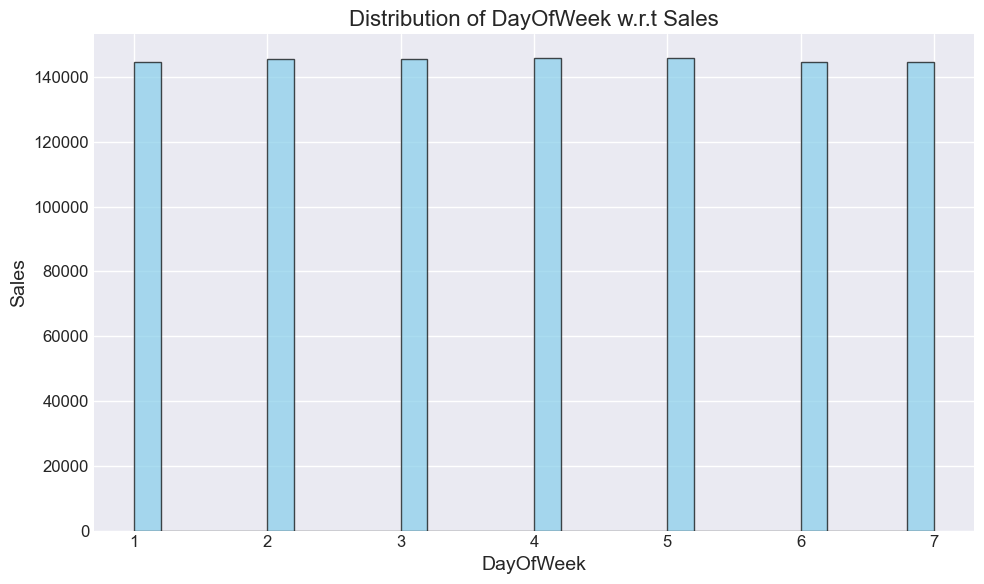

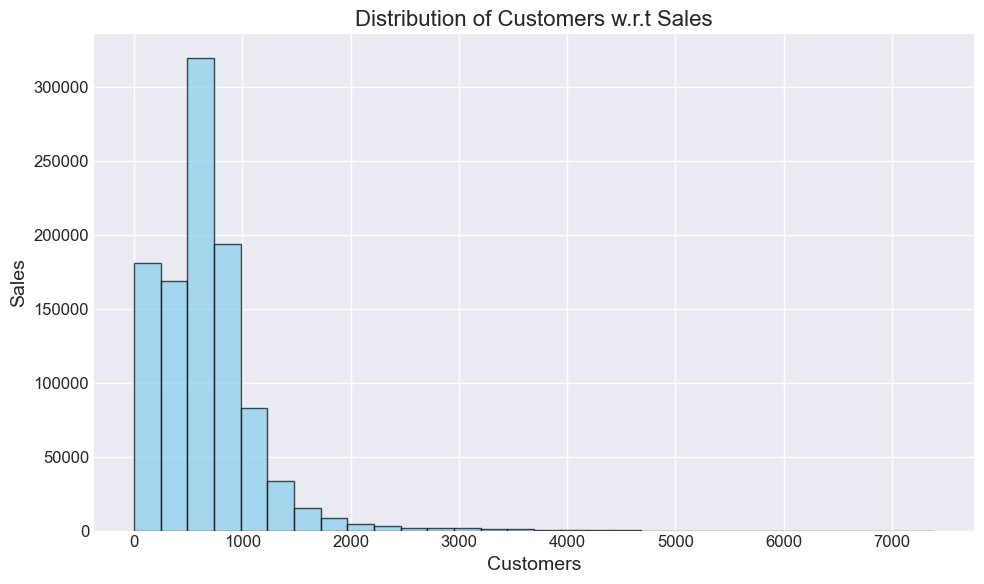

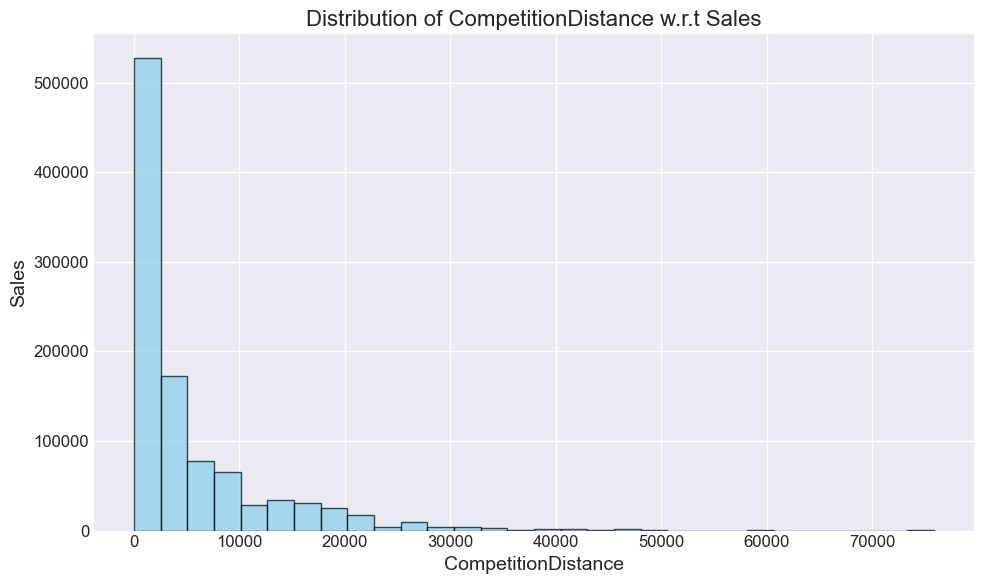

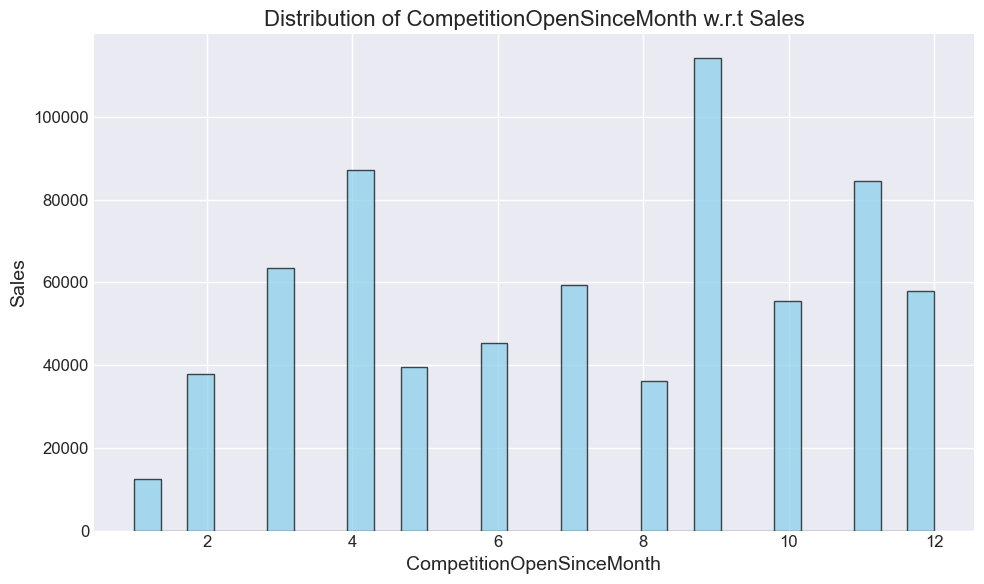

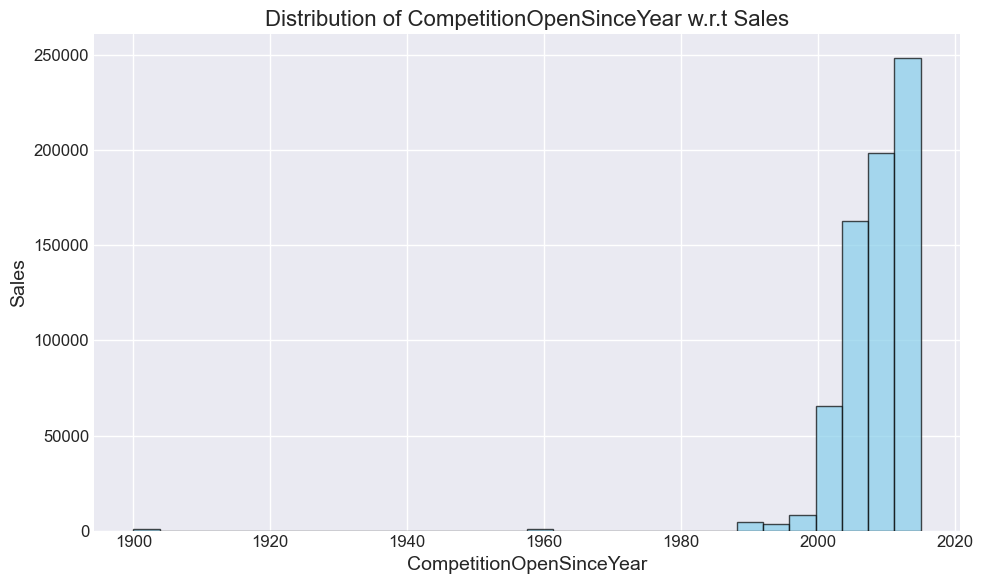

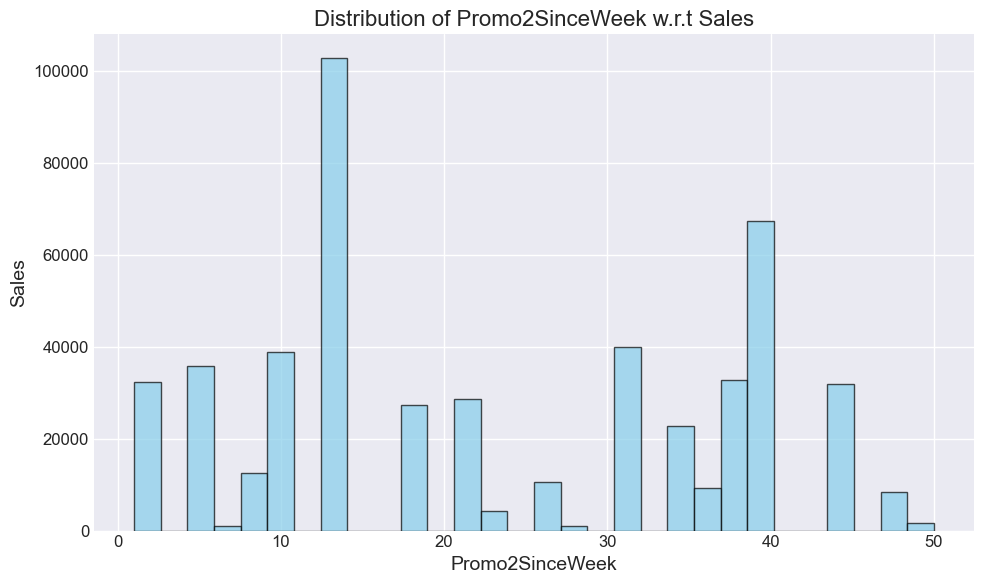

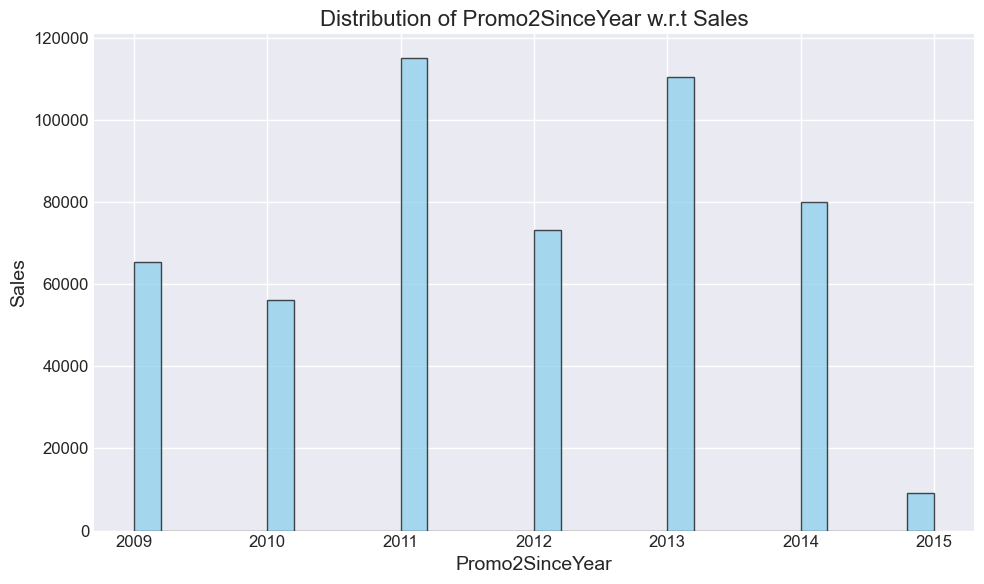

In [15]:
for col in numerical_columns:
	if col != 'Sales':
		plt.figure()

		# Adding more parameters to plt.hist()
		plt.hist(
			x=training_data[col],
			bins=30,             # Number of bins. You can experiment with this value.
								 # Too few: oversmooths, too many: too noisy.
			color='skyblue',     # Color of the histogram bars
			edgecolor='black',   # Color of the bar borders for better separation
			alpha=0.7,           # Transparency of the bars (0.0 to 1.0)
			density=False        # If True, the y-axis will show probability density.
								 # If False (default), it shows counts/frequency.
		)
		plt.title(f'Distribution of {col} w.r.t Sales')
		plt.xlabel(col)
		plt.ylabel('Sales') # Y-axis represents count/frequency for a histogram
		plt.tight_layout() # Adjusts plot to ensure everything fits without overlapping
		plt.show()

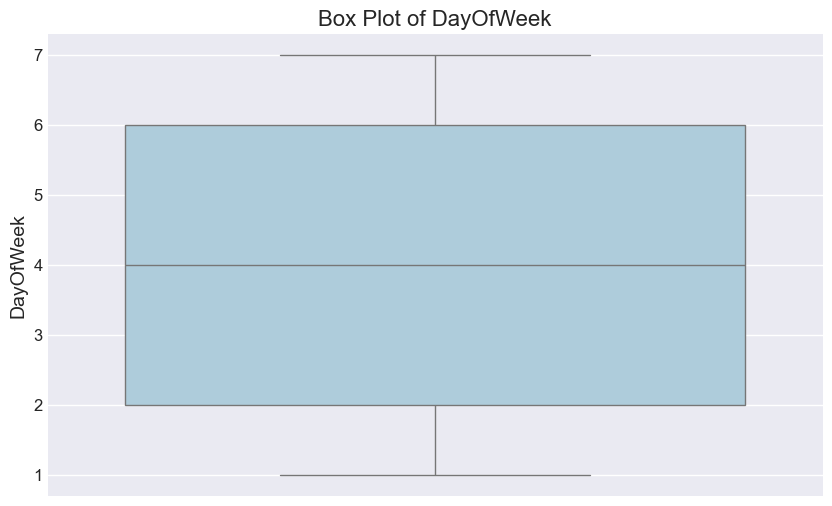

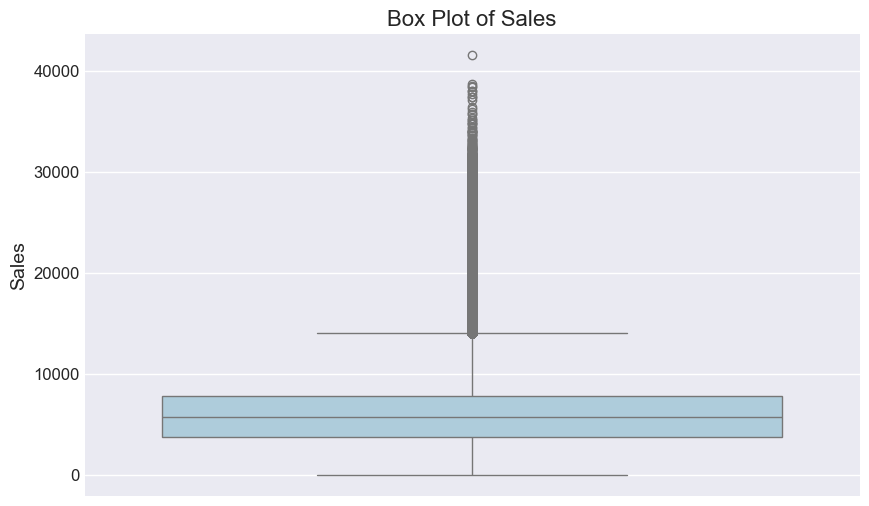

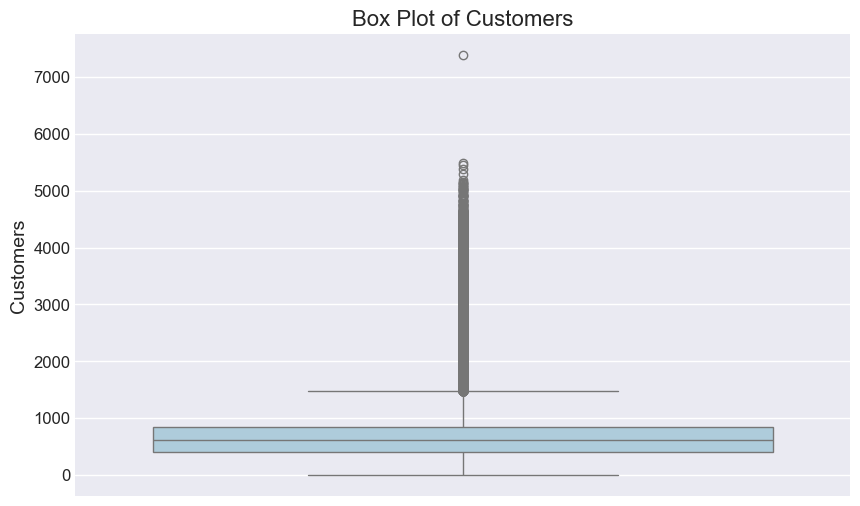

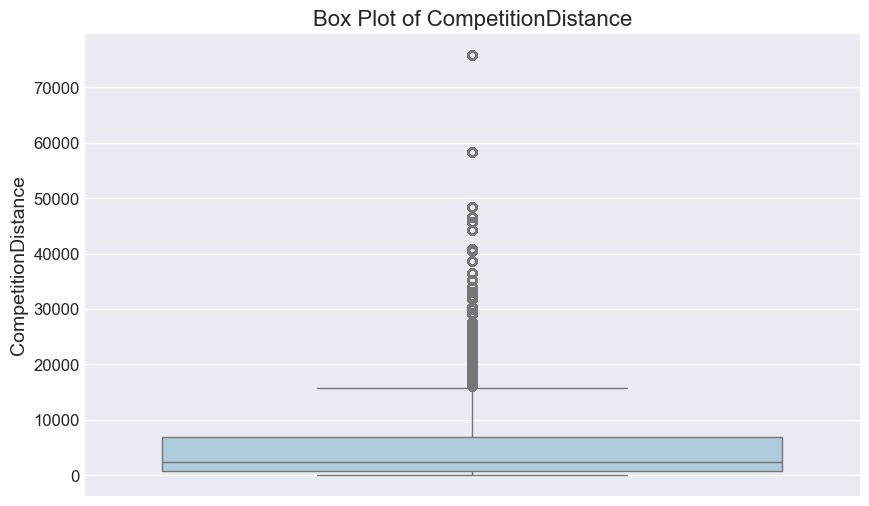

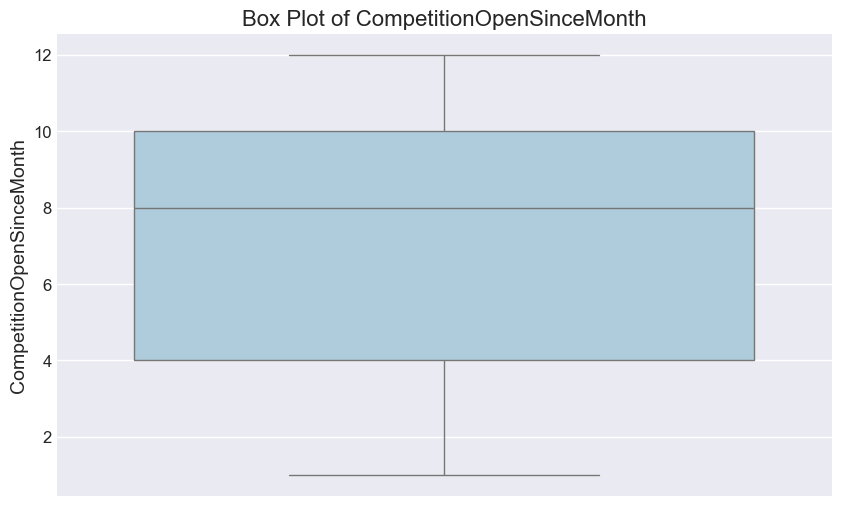

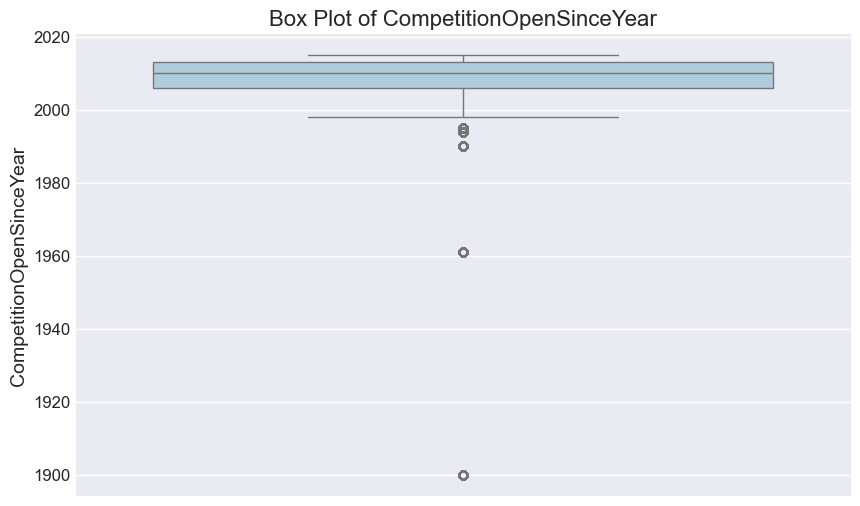

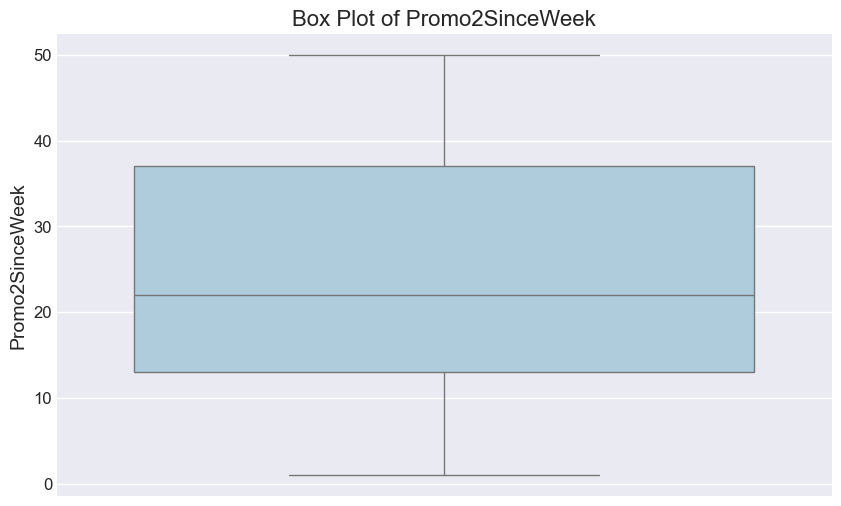

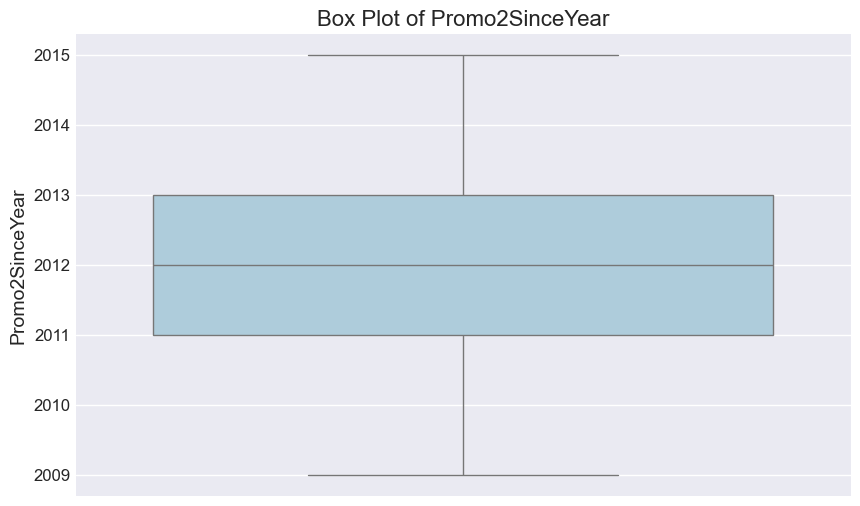

In [16]:
for col in numerical_columns:
    plt.figure()
    sns.boxplot(y=training_data[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()


## Count plot for categorical data



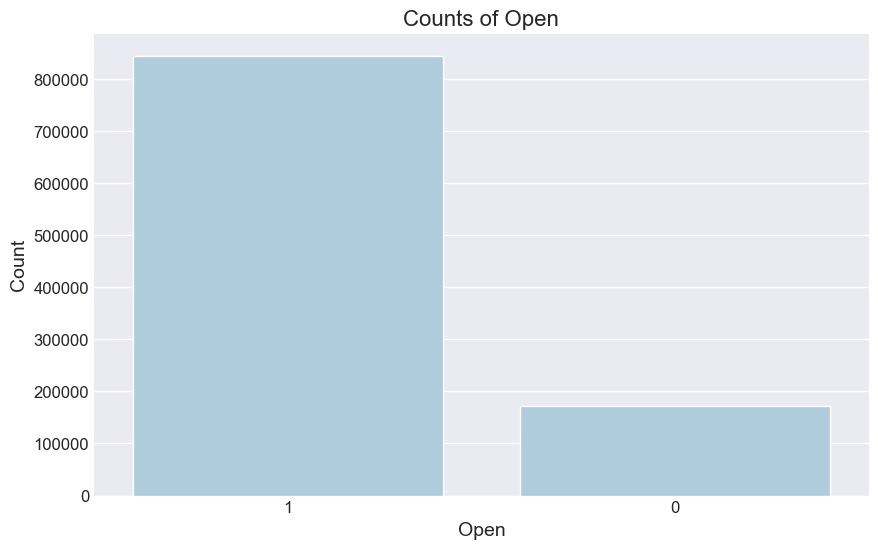

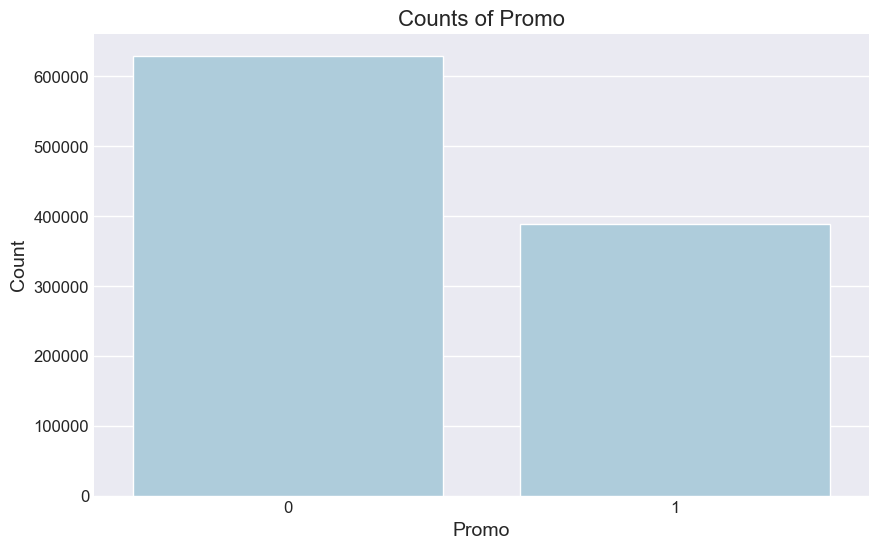

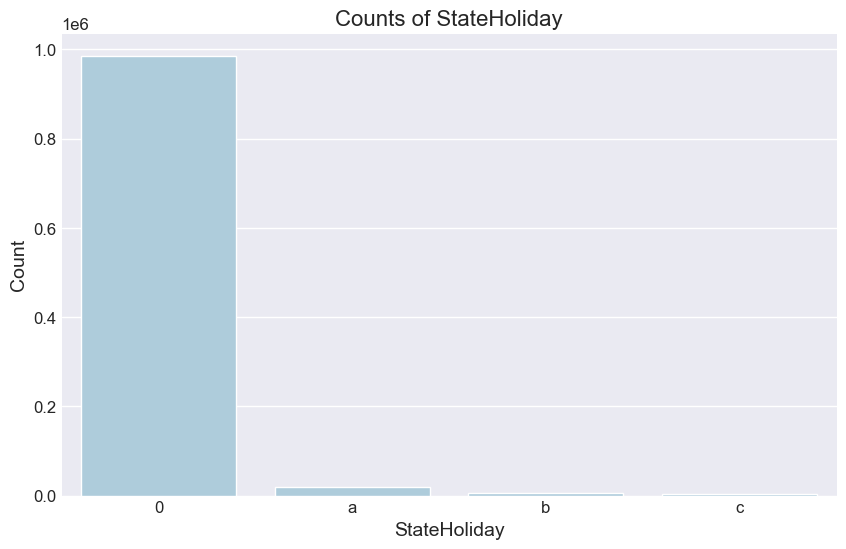

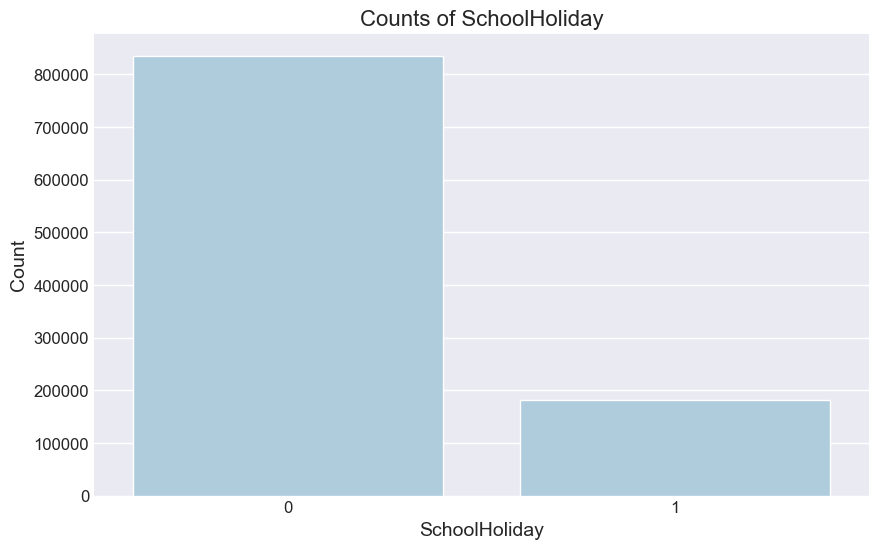

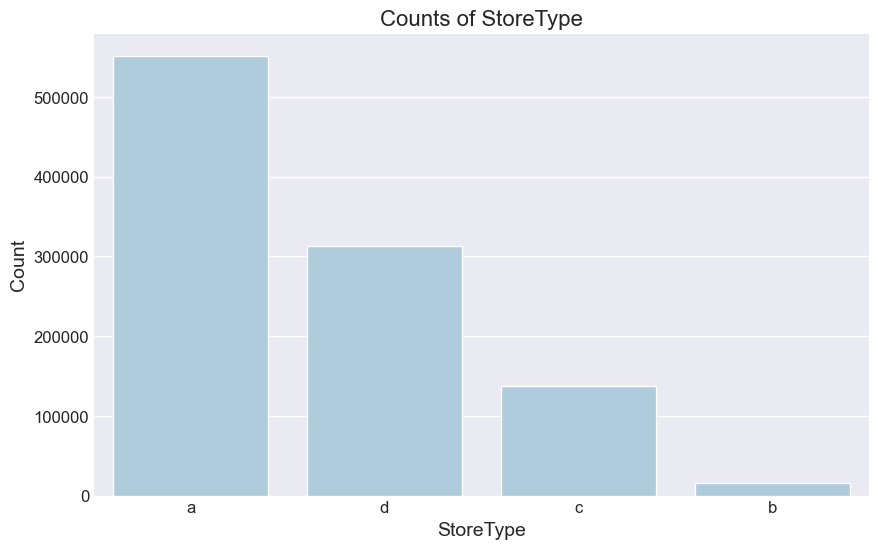

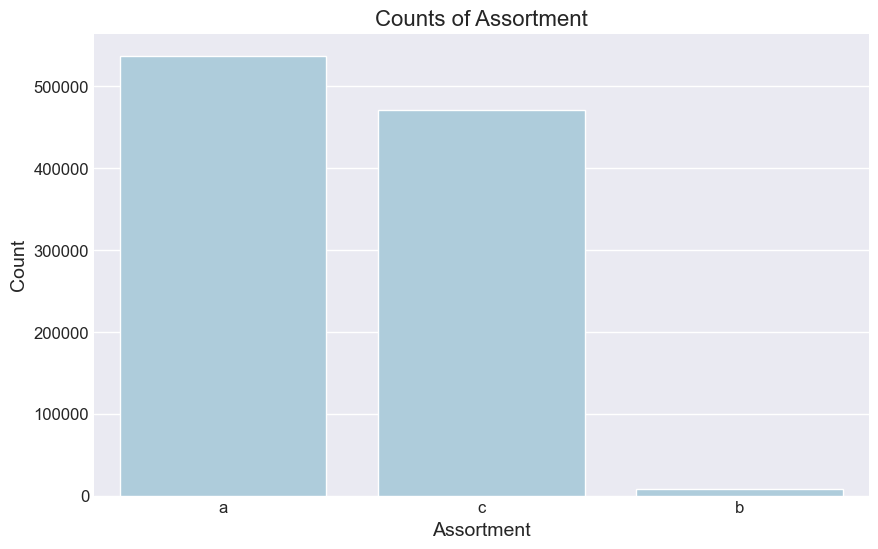

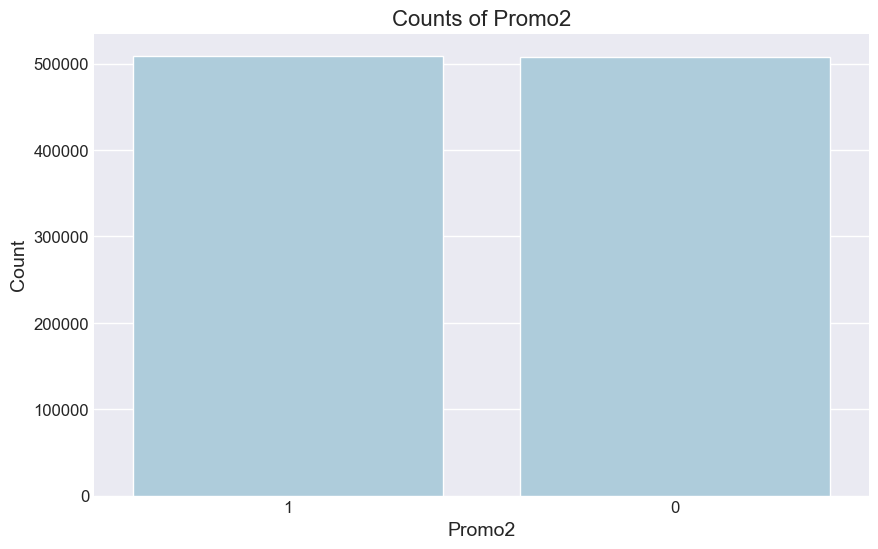

In [17]:
for col in ['Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'Promo2']:
    plt.figure()
    sns.countplot(x=training_data[col].astype(str), order=training_data[col].astype(str).value_counts().index)
    plt.title(f'Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


## Value counts for PromoInterval (which is a string)


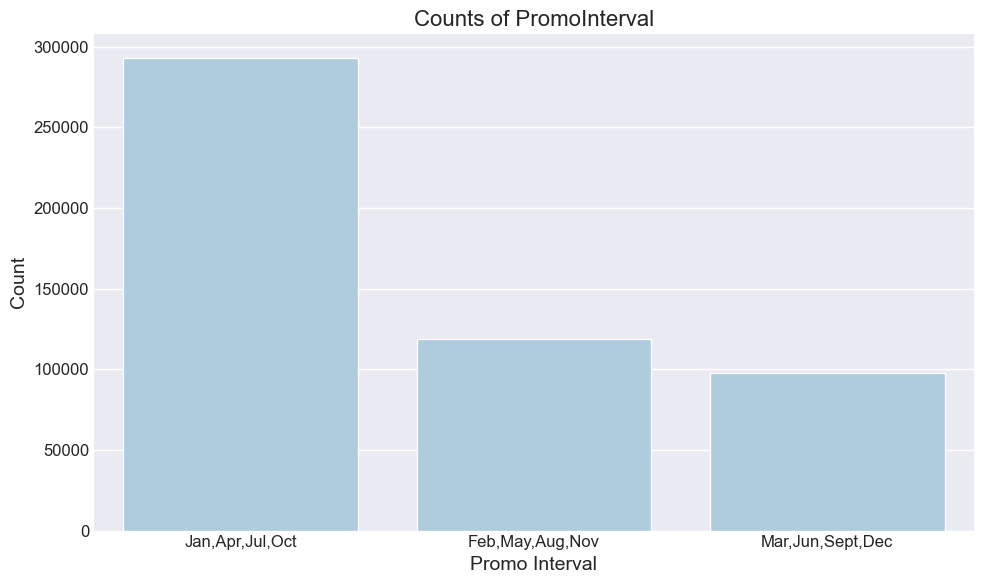

In [22]:
sns.countplot(x=training_data['PromoInterval'], order=training_data['PromoInterval'].value_counts().index)
plt.title('Counts of PromoInterval')
plt.xlabel('Promo Interval')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

class DateFeatureExtractor(BaseEstimator, TransformerMixin):
	def __init__(self, date_column='Date', date_format='%Y-%m-%d'):
		self.date_column = date_column
		self.date_format = date_format

	def fit(self, X, y=None):
		return self

	def transform(self, X):
		if not isinstance(X, pd.DataFrame):
			if X.ndim == 1:
				X_transformed = pd.DataFrame(X, columns=[self.date_column])
			else:
				X_transformed = pd.DataFrame(X)
		else:
			X_transformed = X.copy()

		X_transformed[self.date_column] = pd.to_datetime(X_transformed[self.date_column], format=self.date_format)

		X_transformed['Year'] = X_transformed[self.date_column].dt.year
		X_transformed['Month'] = X_transformed[self.date_column].dt.month
		X_transformed['DayOfMonth'] = X_transformed[self.date_column].dt.day
		X_transformed['WeekOfYear'] = X_transformed[self.date_column].dt.isocalendar().week.astype(int)
		X_transformed['Quarter'] = X_transformed[self.date_column].dt.quarter
		X_transformed['IsWeekend'] = (X_transformed[self.date_column].dt.dayofweek >= 5).astype(int)

		X_transformed = X_transformed.drop(columns=[self.date_column], axis=1)

		return X_transformed

dfe = DateFeatureExtractor().fit(training_data).transform(training_data)
training_data = dfe.copy(deep=True)

In [19]:
training_data

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth,WeekOfYear,Quarter,IsWeekend
0,1,5,5263,555,1,1,0,1,c,a,...,0,NaN,NaN,NaN,2015,7,31,31,3,0
1,2,5,6064,625,1,1,0,1,a,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,3,0
2,3,5,8314,821,1,1,0,1,a,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,3,0
3,4,5,13995,1498,1,1,0,1,c,c,...,0,NaN,NaN,NaN,2015,7,31,31,3,0
4,5,5,4822,559,1,1,0,1,a,a,...,0,NaN,NaN,NaN,2015,7,31,31,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,a,1,a,a,...,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1,1,0
1017205,1112,2,0,0,0,0,a,1,c,c,...,0,NaN,NaN,NaN,2013,1,1,1,1,0
1017206,1113,2,0,0,0,0,a,1,a,c,...,0,NaN,NaN,NaN,2013,1,1,1,1,0
1017207,1114,2,0,0,0,0,a,1,a,c,...,0,NaN,NaN,NaN,2013,1,1,1,1,0


In [20]:
numerical_steps = [
	
]

In [21]:
X = training_data.drop(['Sales'], axis=1)
y = training_data['Sales']